3주차 복습 예제

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings(action='ignore')

# 1번

 iris데이터셋 준비

In [ ]:
from sklearn.datasets import load_iris
import pandas as pd
iris_dataset = load_iris()
X = pd.DataFrame(iris_dataset['data'], columns=iris_dataset['feature_names'])
y = pd.DataFrame(iris_dataset['target'], columns=['target'])

In [ ]:
print(X.shape)
print(y.shape)

(150, 4)
(150, 1)


In [ ]:
X

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


y데이터의 구성을 확인하고(value_counts, unique 등 자유롭게 이용) KNeighborClassifier,KNeighborRegressor 중 사용할 모델을 import 하세요.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

print(y['target'].unique())

[0 1 2]


y데이터 클래스의 비율을 유지한 채 훈련데이터와 테스트데이터를 나누세요(random_state=10) 

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X, y, stratify=y, random_state=10)

n_neighbors=4로 학습시키고 X_test 데이터의 pred값, y_test 값을 각각 출력하세요
(y_test는 pred와 같은 형식으로 출력 hint) ravel(), flatten() 등

In [ ]:
kn=KNeighborsClassifier(n_neighbors = 4)
kn.fit(X_train,y_train)
pred=kn.predict(X_test)
print(f'X_test pred : {pred}')
print(f'y_test : {np.ravel(pred)}')

X_test pred : [1 1 1 2 2 1 0 2 2 0 1 1 1 1 0 2 0 1 0 0 2 2 0 1 2 0 2 2 1 2 0 0 0 1 1 1 0
 2]
y_test : [1 1 1 2 2 1 0 2 2 0 1 1 1 1 0 2 0 1 0 0 2 2 0 1 2 0 2 2 1 2 0 0 0 1 1 1 0
 2]


accuracy_score, kn.score로 각각 출력하세요

In [ ]:
from sklearn.metrics import accuracy_score
print(f'accuracy_score : {accuracy_score(y_test,pred)}')
print(f'kn.score : {kn.score(X_test,y_test )}')

accuracy_score : 0.9736842105263158
kn.score : 0.9736842105263158


# 2번

boston 주택가격 데이터셋 준비

In [ ]:
from sklearn.datasets import load_boston
boston=load_boston()
X=pd.DataFrame(boston['data'],columns=boston['feature_names'])
y=pd.DataFrame(boston.target,columns=['price'])

In [ ]:
print(X.shape)
print(y.shape)

(506, 13)
(506, 1)


In [ ]:
X

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [ ]:
y

,price
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2
...,...
501,22.4
502,20.6
503,23.9
504,22.0


데이터셋을 훈련 데이터, 테스트 데이터로 나누세요.(random_state=10)

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X, y, random_state=10)

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

n_neighbors를 1~10까지 했을 떄 가장 mean_absolute_error가 가장 낮은 n_neighbors 수를 출력하고 1~10까지의 error를 시각화 하세요

n_neighbors=8 / abs_error : 5.013582677165355


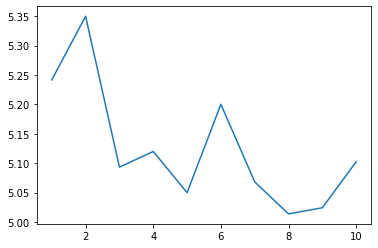

In [ ]:
from sklearn.metrics import mean_absolute_error

error=[]
for i in range (1,11):
  knr=KNeighborsRegressor(n_neighbors = i)
  knr.fit(X_train,y_train)
  pred=knr.predict(X_test)
  error.append(mean_absolute_error(y_test,pred))
plt.plot(range(1,11),error)
print(f'n_neighbors={np.argmin(error)+1} / abs_error : {min(error)}')

In [ ]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# 1. 선형 회귀

In [ ]:
# advertising.csv (광고(TV, Radio, Newspaper) 및 판매량(Sales) 데이터셋)
from google.colab import files
uploaded = files.upload()

Saving advertising.csv to advertising (1).csv


In [ ]:
# csv파일 dataframe으로 읽어들이기
advertising=pd.DataFrame(pd.read_csv('advertising.csv'))

## 탐색적 데이터 분석

In [ ]:
# 첫 5행 출력
advertising.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [ ]:
# 데이터프레임 shape 츨력
advertising.shape

(200, 4)

In [ ]:
# 컬럼별 통계량 출력
advertising.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [ ]:
# 결측치 확인
advertising.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

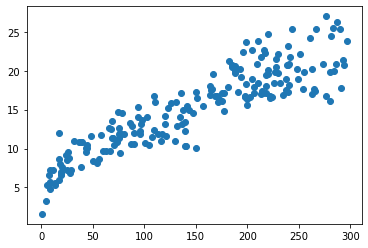

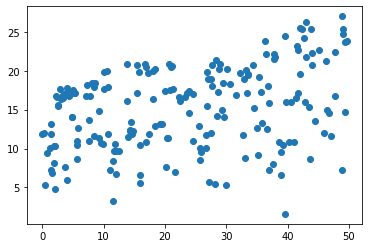

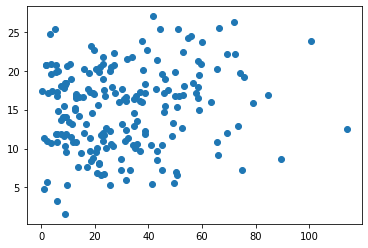

In [ ]:
# scatter plot을 사용해 Sales와 나머지 변수 간의 관계 확인
plt.scatter(advertising['TV'],advertising['Sales'])
plt.show()
plt.scatter(advertising['Radio'],advertising['Sales'])
plt.show()
plt.scatter(advertising['Newspaper'],advertising['Sales'])
plt.show()

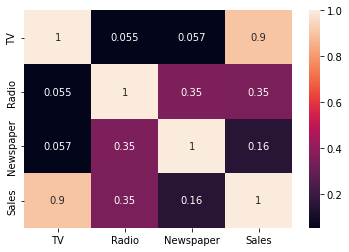

In [ ]:
# 변수 간의 correlation 확인 (힌트 : seaborn의 heatmap, dataframe의 corr() 사용)
sns.heatmap(advertising.corr(),annot=True)

## 모델 생성, 학습

In [ ]:
# scatterplot과 heatmap에서 볼 수 있듯이, Sales와 가장 상관관계가 높은 변수가 TV이므로 
# TV 변수만을 이용해 simple linear regression 하자.

# +) 변수가 하나일 때 추정한 선형모델이 잘 fitting되는지 2차원 그래프에서 확인하기 쉬워서 변수를 하나만 선택했다.
# 실제로는 여러 변수를 사용하고, 기존 변수들로부터 새로운 변수를 만들어내기도 한다. 
# 이러한 feature engineering 과정은 ML에서 핵심적이다.

X=advertising['TV']
y=advertising['Sales']


In [ ]:
# train-test split (7:3)
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)

In [ ]:
# 선형 회귀 모델 생성
lr=LinearRegression()

# 학습 데이터를 이용해 모델 학습
lr.fit(X_train[:,None], y_train)

LinearRegression()

In [ ]:
# The coefficients
print(lr.coef_)
# The intercept
print(lr.intercept_)

[0.05483488]
7.206554548173251


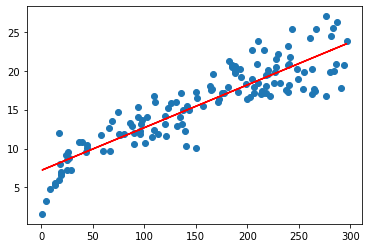

In [ ]:
# 학습 데이터 산점도를 그리고, 추정한 선형 모델을 표시해 잘 fitting되었는지 확인한다.
plt.scatter(X_train,y_train)
plt.plot(X_train, lr.coef_*X_train+lr.intercept_,'r')
plt.show()

## 모델 evaluation

In [ ]:
# 학습시킨 모델로 테스트 데이터 예측
pred=lr.predict(X_test[:, None])

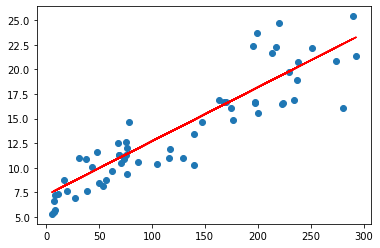

In [ ]:
# 테스트 데이터 산점도를 그리고, 추정한 선형 모델을 표시해 잘 fitting되었는지 확인한다.
plt.scatter(X_test,y_test)
plt.plot(X_test, lr.coef_*X_test+lr.intercept_,'r')
plt.show()


In [ ]:
# MSE 소수점 둘째 자리까지
print("MSE : %.2f" %mean_squared_error(y_test, pred))

# R-squared 소수점 둘째 자리까지
# R2 = 0.816 의미 : Sales 분산의 81.6%는 TV로 설명된다
print("R2 : %.2f" %r2_score(y_test,pred))

MSE : 5.18
R2 : 0.81


In [ ]:
# mse 직접 구현 (X_np, lr.coef_, lr.intercept_, y_test 및 np 함수 사용)
# sklearn의 mean_squared_error함수로 구한 것과 일치하는지 확인
X_np = X_test.to_numpy()
X_np = X_np.reshape(-1,1)
mse=np.mean((X_np@lr.coef_+lr.intercept_ - y_test)**2)
print(mse)

5.179525402166653


# 2. 다항 회귀

다항회귀로 당뇨병 예측 모델 만들기 

In [ ]:
#PolynomialFeatures 임포트

from sklearn.preprocessing import PolynomialFeatures

In [ ]:
#데이터 셋 준비

diabetes_dataset = datasets.load_diabetes()


## 2차식 피처로 변환

In [ ]:
#PolynomialFeatures로 2차식 변환
polynomial_transformer = PolynomialFeatures(2)
polynomial_data = polynomial_transformer.fit_transform(diabetes_dataset.data)
polynomial_feature_names = polynomial_transformer.get_feature_names(diabetes_dataset.feature_names)

In [ ]:
#X, y 준비 (힌트 : feature 데이터는 polynomial_data에, target 데이터는 diabetes_dataset.target에 있으며 columns는 diabetes)
X = pd.DataFrame(polynomial_data, columns = polynomial_feature_names)
y = pd.DataFrame(diabetes_dataset.target, columns=['diabetes'])

#선형 회귀

In [ ]:
#데이터 스플릿 (8 : 2)
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

In [ ]:
#선형 회귀 모델 생성 및 학습
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [ ]:
#예측
y_test_prediction = model.predict(x_test)

In [ ]:
# RMSE
print("RMSE : %.2f" % mean_squared_error(y_test,y_test_prediction)**0.5)

RMSE : 57.88
